In [64]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import sweetviz as sv
import phik

from autoviz.AutoViz_Class import AutoViz_Class
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from keras import layers

In [65]:
%matplotlib inline

In [66]:
df = pd.read_csv("Telecom_Customers_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h3>Quick check for NaNs and duplicates</h3>

In [67]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [68]:
df.duplicated().sum()

0

In [69]:
# Generate the data profiling report
report = ProfileReport(df, title='telecom')
report.to_file("ydata.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 350.99it/s]


<h1>Data format correction</h3>

In [70]:
# Drop ID column
df.drop("customerID", axis=1, inplace=True)

In [71]:
# lowercase all columns
df.columns = map(str.lower, df.columns)

In [72]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h3>Incorrect data format</h3>
Wrong data format in column total charges

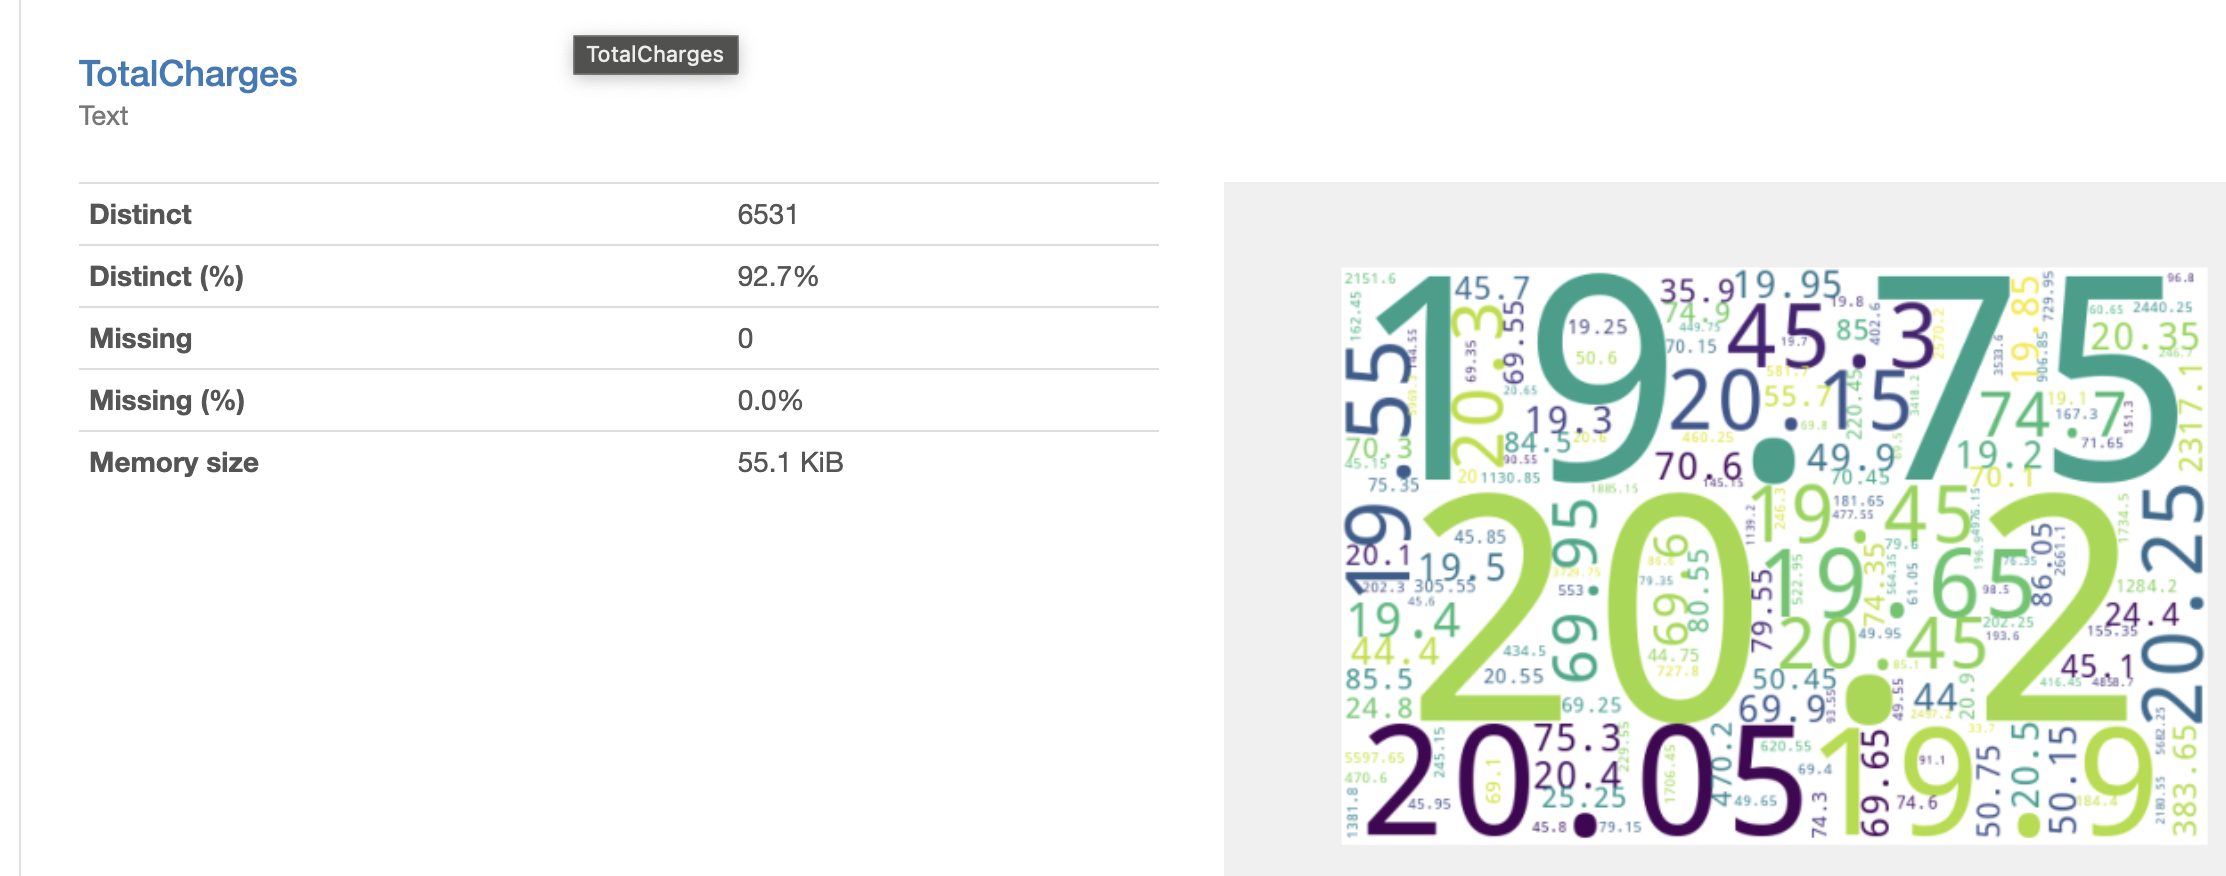

Binary columns to simply encode:

-> gender

-> partner

-> dependents

-> phone service

<h3>Data Redundancy</h3>
Ydata is alerting about high correlations. There are columns Phone service and Internet service, which by nature means does client have phone service or internet. 
However, there is same data stored in columns:

-> multiplelines

-> online security

-> online backup

-> device protection

-> tech support

-> streaming tv

-> streaming movies

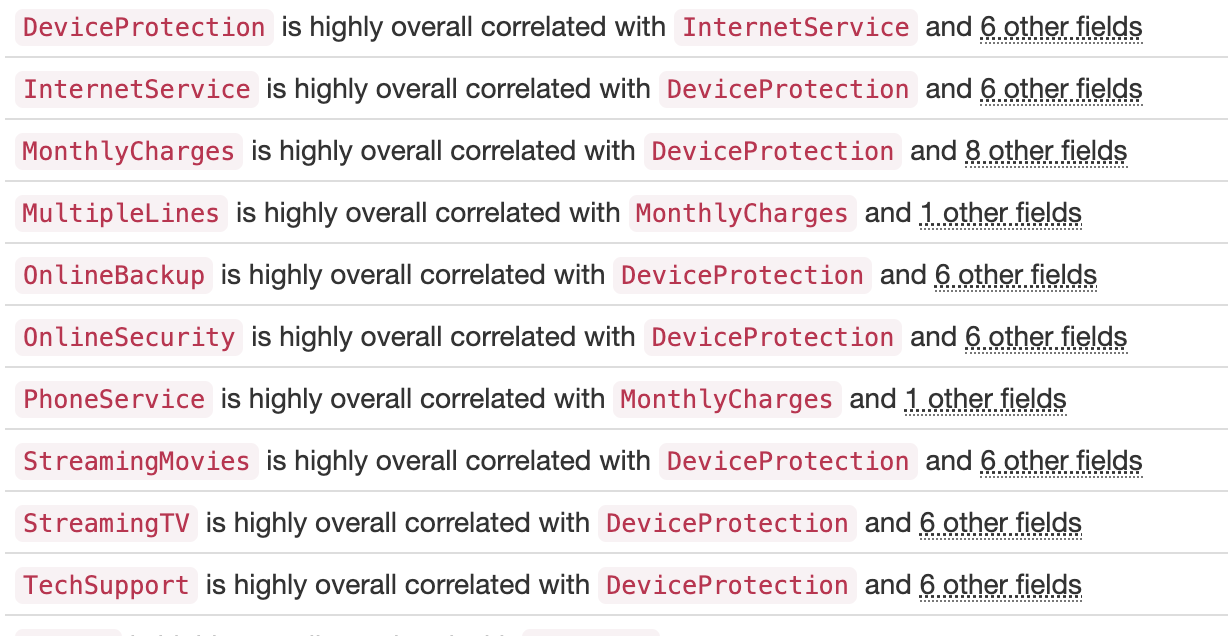

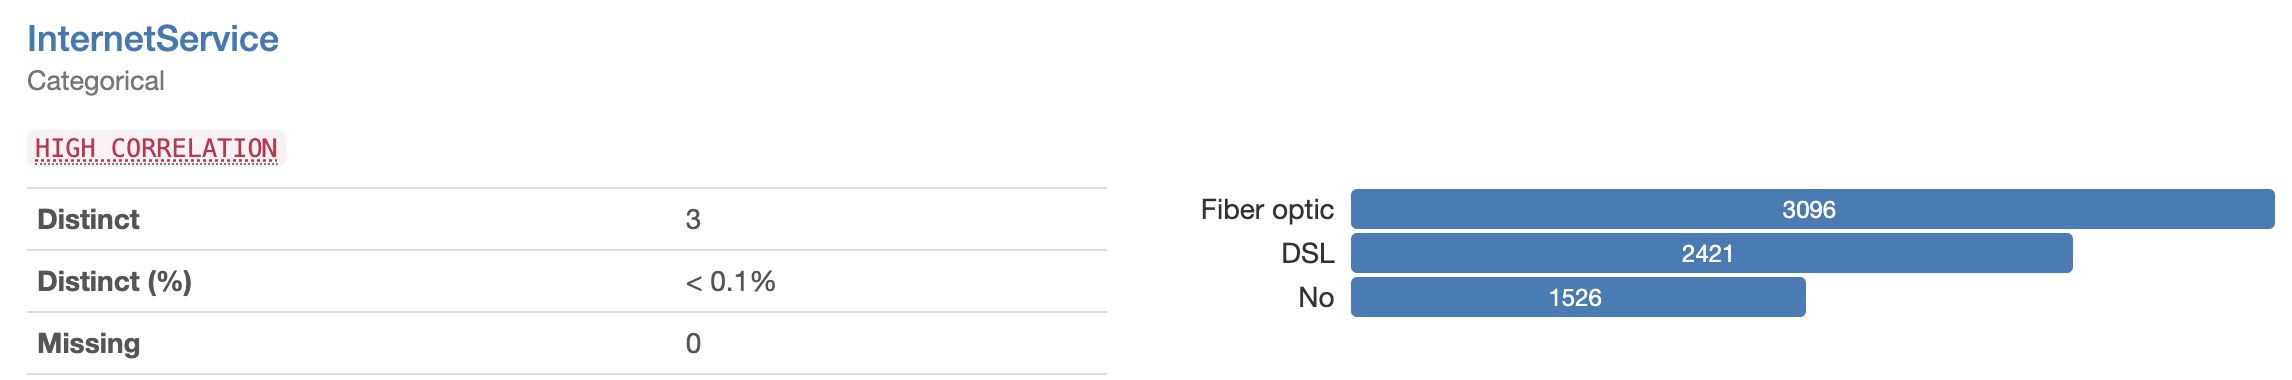

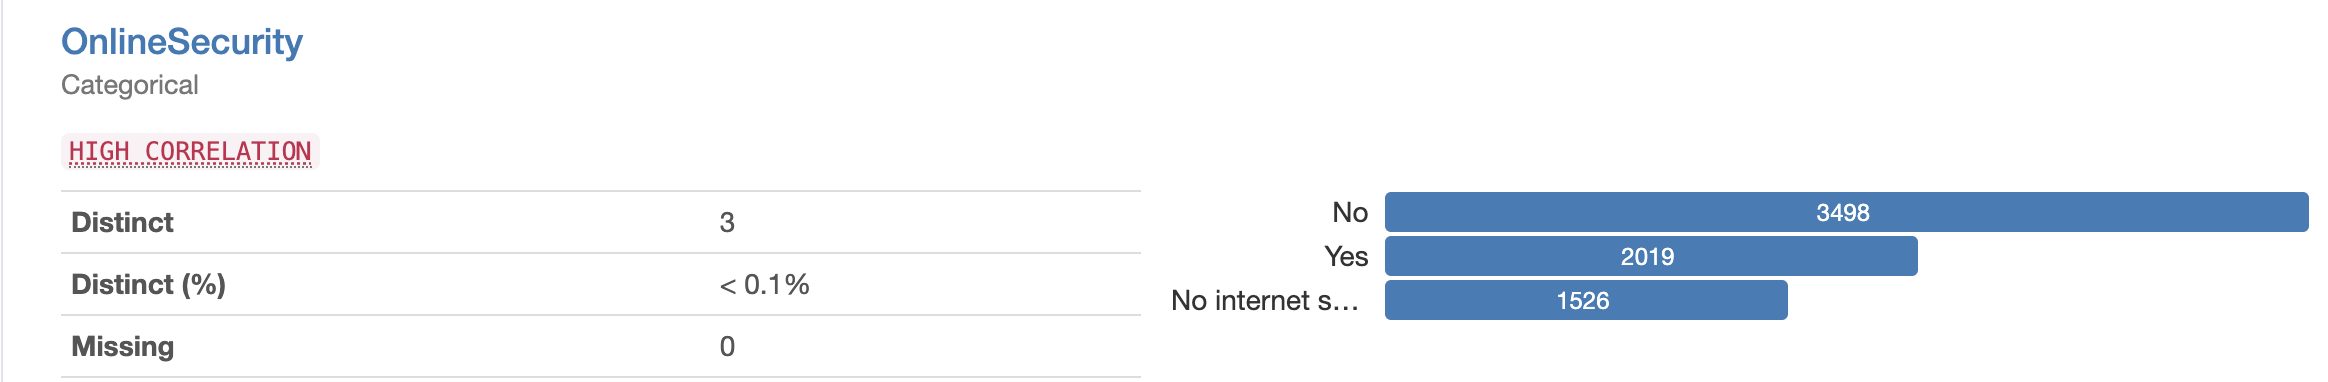




In [73]:
# Seems like this is the reason why column format is text
null_totalcharges = df[df["totalcharges"] == " "]
null_totalcharges


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [74]:
# drop 11 rows with null values 
df.drop(null_totalcharges.index, inplace=True)
# change datatype of column to float
df.totalcharges = df.totalcharges.astype(float)

In [75]:
# columns with a redundancy with internet service column
internet_service_variables = ["onlinesecurity", 
                              "onlinebackup", 
                              "deviceprotection", 
                              "techsupport", 
                              "streamingtv", 
                              "streamingmovies"]
# same for phone service
phone_service_variables = ["multiplelines"]

# Replace "No internet service" to "No"
for variable in internet_service_variables:
        df[variable] = df[variable].replace('No internet service', 'No')
# same for phone service
for variable in phone_service_variables:
        df[variable] = df[variable].replace('No phone service', 'No')

In [76]:
# binary text columns to encode to 1/0 values:
variables = ["gender", "partner", "dependents", "phoneservice","onlinesecurity", "onlinebackup", 
             "deviceprotection", "techsupport", "streamingtv", "streamingmovies", "multiplelines", "paperlessbilling", "churn"]

encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)


<h3>AutoViz</h3>

In [77]:
AV = AutoViz_Class()
filename = df
target_variable = "churn"
report = AV.AutoViz("", depVar=target_variable, dfte=df, chart_format="html")

Shape of your Data Set loaded: (7032, 20)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  13
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    19 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################


Saving scatterplots in HTML format
  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  6.56it/s]

Saving pair_scatters in HTML format


Saving distplots_cats in HTML format


Saving distplots_nums in HTML format


KDE plot is erroring due to problems with DynamicMaps. Hence it is skipped


Saving violinplots in HTML format


No date vars could be found in data set


Saving heatmaps in HTML format


Saving cat_var_plots in HTML format
                                               

Time to run AutoViz (in seconds) = 8


In [78]:
from autoviz import FixDQ
fixdq = FixDQ()

<h3>SweetViz</h3>

In [79]:
# SV analyze and create HTML-report
report = sv.analyze(df)
report.show_html('sv_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sv_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<h3>Imbalance</h3>

-> seniorcitizen - highly imbalanced, looks like outliers, also doesn't really provide any information on other columns. Potential canditate for deleting.

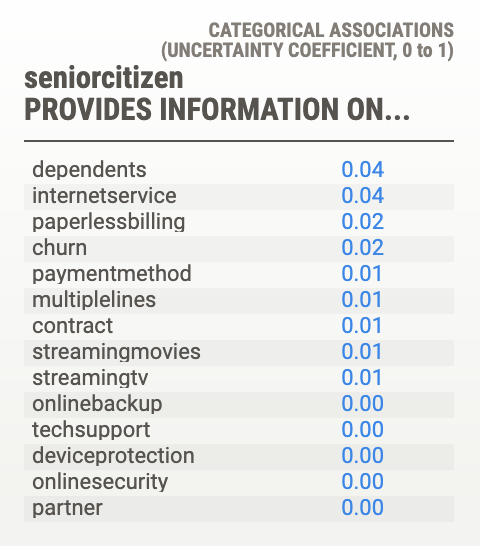

-> dependents - sameish as seniorcitizen, also correlates with partner, which makes sense in case we count dependents as children. Possible handling - combine dependents and partner column to "family". If client has partner or dependents -> he has family.

-> phone service - highly imbalanced, outlier? I think phone service column should be deleted. First of all, people with no phone could be considered as outliers. Second thing is that there might be so overlapping between phone service and internet service. If you have DSL connection, then you probably have phone service as well. And if you don't have any internet connection you might not have a phone as well. However it's hard to say what kind of phone service we are talking about: is it stationary or cell phone?
Also in the dataset we have "multiple lines" column which descrives phone service as well but has better balance, gives more information about other variables and correlates better with charges. 

-> online backup - additional service

-> device protection - additional service

-> techsupport - additional service

-> streaming tv - additional service

-> streaming movies - additional service, sameish as streaming tv

Might be a good idea to create column additional services and join all above there by counting how many services client is using.

-> contract - sampling technics might help

-> churn - sampling technics goes there as well


<h3>Distribution</h3>

-> tenure

-> monthly charge

-> total charges

Tenure means how many month the client was loyal, so there are a lot of new and old clients, but in between there are not so many. Also there might be redundacy with total charges, by logic total charges = monthly charges * tenure.

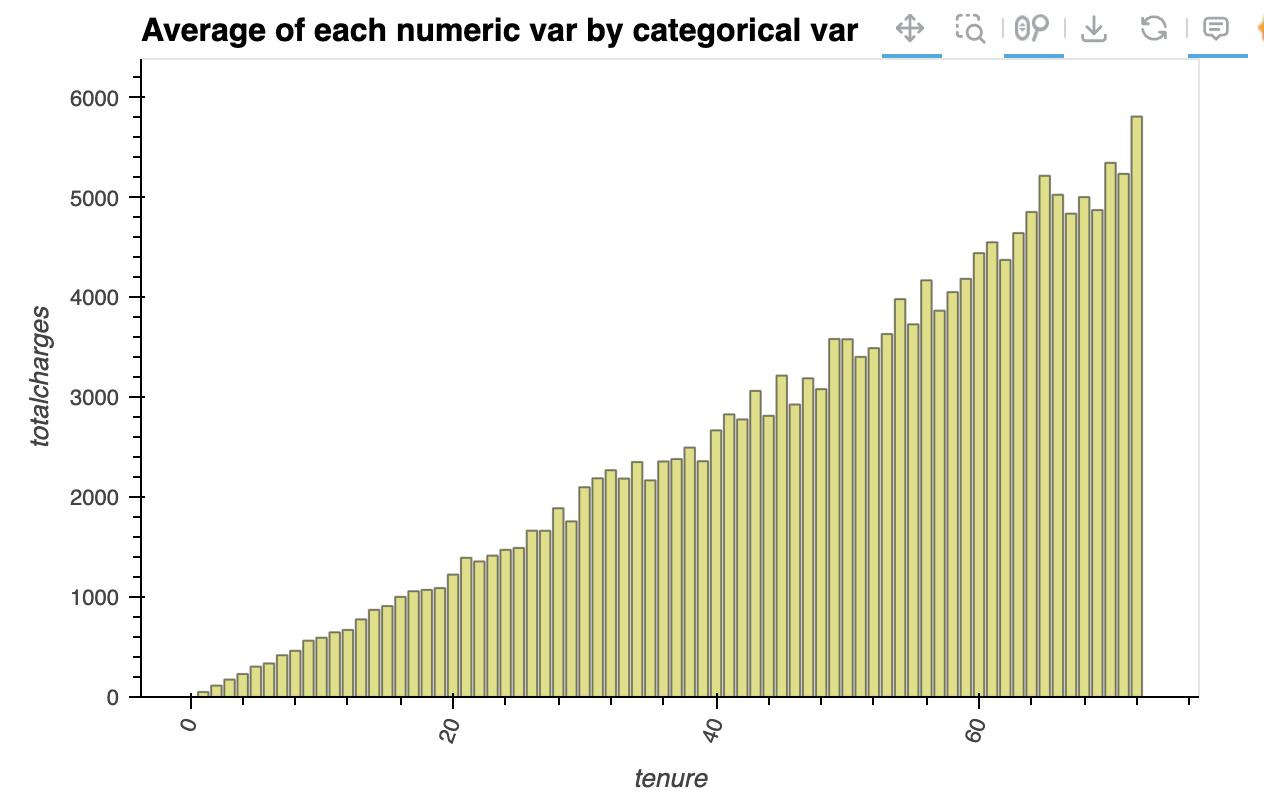

For me it looks like tenure and total charges are quite dependent

In [80]:
# Check if gender somehow affects churn
sns.histplot(binwidth=0.5, x="gender", hue="churn", data=df, stat="count", multiple="stack")

<Axes: xlabel='gender', ylabel='Count'>

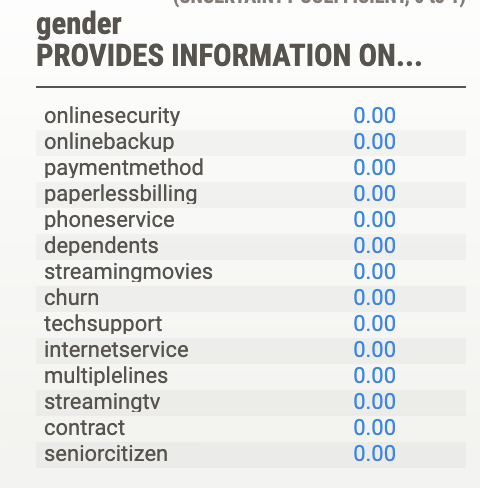

I assume gender doesn't bring any new information to the dataset.

In [81]:
df.drop("gender", axis=1, inplace=True)

In [82]:
# same check for seniors
sns.histplot(binwidth=0.5, x="seniorcitizen", hue="churn", data=df, stat="count", multiple="stack")

<Axes: xlabel='gender', ylabel='Count'>

Actually, almost half of the seniors are clients, so may be it's not that useless column. Let's leave it for now

In [83]:
df.drop("phoneservice", axis=1, inplace=True)

In [84]:
# Joining additional services
variables = ["onlinebackup", "deviceprotection", "techsupport", "streamingtv", "streamingmovies"]
# Create a new column 'service_count' that sums the values across the 5 columns
df['service_count'] = df[variables].sum(axis=1)
df.drop(variables, axis=1, inplace=True)

In [85]:
# Join partner and dependants in family column
variables = ["partner","dependents"]

# Create family variable with logical OR between 'partner' and 'dependants'
df['family'] = df['partner'] | df['dependents']
df.drop(variables, axis=1, inplace=True)


In [86]:
# Drop totalcharges
df.drop("totalcharges", axis=1, inplace=True)

In [87]:
# Contract column has options Month-to-month, One year, Two year. I assume it is ordinal category
replacements = {
    "Month-to-month": 1,
    "One year": 2,
    "Two year": 3
 }
df.contract = df.contract.replace(replacements).astype(int)

The question is if internet service is ordinal enough. I assume that one can say that no internet might be 0, DSL as it is slower and kind of "worse" then fiber optic might be 1 and fiber optic as a best option could be 2. Same logic is applicable from the price points as well:

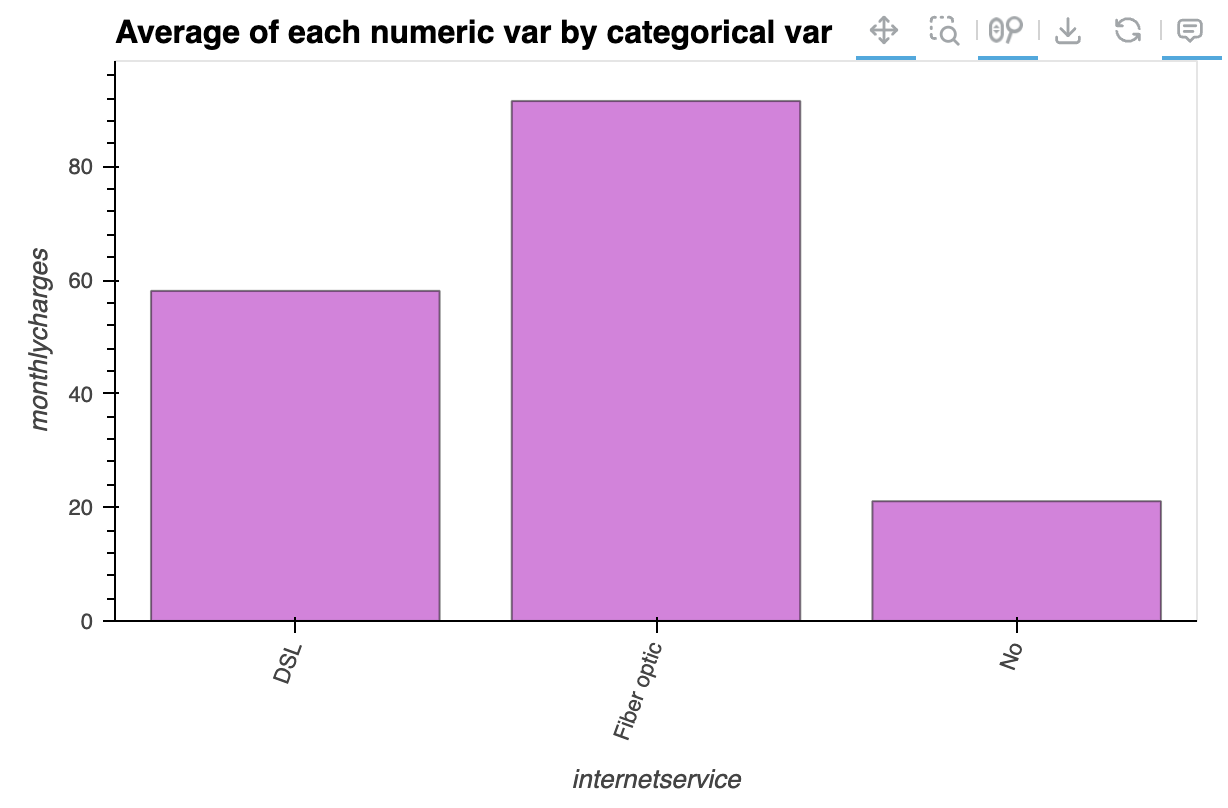



In [88]:
replacements = {
    "No": 0,
    "DSL": 1,
    "Fiber optic": 2
 }
df.internetservice = df.internetservice.replace(replacements).astype(int)

TODO conclusion and plan for handling imbalances. Also outlier managment